# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


from pprint import pprint
import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


ea05a661f2c8a1163cc3c2f26d142154


In [93]:
print (api_key)

ea05a661f2c8a1163cc3c2f26d142154


## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
#using set for unique value
cities = set()

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    #set if logic
       cities.add(city)

# Print the city count to confirm sufficient count

# turning set back into list 
cities=list(cities)
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
#create lists
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

#url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

for place in cities:
    
    #initiate index for cities
    index = cities.index(place)+1
    
    print(f"Retreiving Weather Data for {place}. ({index} of {len(cities)})")
    
    response = requests.get(query_url + place).json()
    print (response)
    #error handling response
    try:
        city.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])

    except Exception as err:
        print(". City not found. skipping..." + str(err))
        
        



Retreiving Weather Data for wulanhaote. (1 of 598)
{'cod': '404', 'message': 'city not found'}
. City not found. skipping...'name'
Retreiving Weather Data for okhotsk. (2 of 598)
{'coord': {'lon': 143.24, 'lat': 59.36}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.95, 'pressure': 1002.52, 'humidity': 87, 'temp_min': 12.95, 'temp_max': 12.95, 'sea_level': 1002.52, 'grnd_level': 998.04}, 'wind': {'speed': 1.91, 'deg': 183.389}, 'clouds': {'all': 100}, 'dt': 1564436515, 'sys': {'message': 0.0057, 'country': 'RU', 'sunrise': 1564423545, 'sunset': 1564484462}, 'timezone': 36000, 'id': 2122605, 'name': 'Okhotsk', 'cod': 200}
Retreiving Weather Data for busselton. (3 of 598)
{'coord': {'lon': 115.35, 'lat': -33.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 4.33, 'pressure': 1018, 'humidity': 73, 'temp_min': 3.33, 'temp_max': 

{'coord': {'lon': 3.03, 'lat': 41.78}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.11, 'pressure': 1012, 'humidity': 83, 'temp_min': 22.78, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 1.33, 'deg': 229.736}, 'clouds': {'all': 0}, 'dt': 1564436517, 'sys': {'type': 1, 'id': 6406, 'message': 0.0072, 'country': 'ES', 'sunrise': 1564375103, 'sunset': 1564427407}, 'timezone': 7200, 'id': 3110643, 'name': 'Sant Feliu de Guixols', 'cod': 200}
Retreiving Weather Data for ponta do sol. (19 of 598)
{'coord': {'lon': -46, 'lat': -20.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.55, 'pressure': 1019.61, 'humidity': 59, 'temp_min': 18.55, 'temp_max': 18.55, 'sea_level': 1019.61, 'grnd_level': 911.02}, 'wind': {'speed': 1.63, 'deg': 27.698}, 'clouds': {'all': 89}, 'dt': 1564436517, 'sys': {'message': 0.0062, 'country':

{'coord': {'lon': -103.15, 'lat': 44.06}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 23.65, 'pressure': 1020, 'humidity': 50, 'temp_min': 21.67, 'temp_max': 25.56}, 'visibility': 16093, 'wind': {'speed': 5.1, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1564436520, 'sys': {'type': 1, 'id': 5631, 'message': 0.0075, 'country': 'US', 'sunrise': 1564400224, 'sunset': 1564453251}, 'timezone': -21600, 'id': 5768244, 'name': 'Rapid Valley', 'cod': 200}
Retreiving Weather Data for bella vista. (34 of 598)
{'coord': {'lon': -65.31, 'lat': -27.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20, 'pressure': 1016, 'humidity': 49, 'temp_min': 20, 'temp_max': 20}, 'visibility': 8000, 'wind': {'speed': 1.08, 'deg': 120.59}, 'clouds': {'all': 0}, 'dt': 1564436520, 'sys': {'type': 1, 'id': 8248, 'message': 0.0061, 'country': 'AR', 'sunrise': 1564

{'coord': {'lon': 31.67, 'lat': -21.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.45, 'pressure': 1019.81, 'humidity': 41, 'temp_min': 14.45, 'temp_max': 14.45, 'sea_level': 1019.81, 'grnd_level': 969.63}, 'wind': {'speed': 1.21, 'deg': 41.15}, 'clouds': {'all': 0}, 'dt': 1564436523, 'sys': {'message': 0.0057, 'country': 'ZW', 'sunrise': 1564374365, 'sunset': 1564414398}, 'timezone': 7200, 'id': 893485, 'name': 'Chiredzi', 'cod': 200}
Retreiving Weather Data for grindavik. (50 of 598)
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16, 'pressure': 1010, 'humidity': 77, 'temp_min': 16, 'temp_max': 16}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1564436523, 'sys': {'type': 1, 'id': 90, 'message': 0.0067, 'country': 'IS', 'sunrise': 1564374556,

{'coord': {'lon': -16.33, 'lat': 33.08}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 21.56, 'pressure': 1022, 'humidity': 77, 'temp_min': 21, 'temp_max': 22}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 30}, 'clouds': {'all': 40}, 'dt': 1564436526, 'sys': {'type': 1, 'id': 6902, 'message': 0.0057, 'country': 'PT', 'sunrise': 1564380967, 'sunset': 1564430835}, 'timezone': 3600, 'id': 2270385, 'name': 'Camacha', 'cod': 200}
Retreiving Weather Data for khon buri. (66 of 598)
{'coord': {'lon': 102.25, 'lat': 14.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.56, 'pressure': 1008, 'humidity': 60, 'temp_min': 25.56, 'temp_max': 25.56}, 'wind': {'speed': 2.06, 'deg': 213.636}, 'rain': {'3h': 0.125}, 'clouds': {'all': 100}, 'dt': 1564436526, 'sys': {'type': 3, 'id': 244086, 'message': 0.0072, 'country': 'TH', 'sunrise':

{'coord': {'lon': -46.03, 'lat': 60.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15, 'pressure': 1015, 'humidity': 47, 'temp_min': 15, 'temp_max': 15}, 'wind': {'speed': 4.6, 'deg': 240}, 'clouds': {'all': 1}, 'dt': 1564436297, 'sys': {'type': 1, 'id': 47, 'message': 0.0065, 'country': 'GL', 'sunrise': 1564381916, 'sunset': 1564444142}, 'timezone': -7200, 'id': 3420846, 'name': 'Qaqortoq', 'cod': 200}
Retreiving Weather Data for cap malheureux. (83 of 598)
{'coord': {'lon': 57.61, 'lat': -19.98}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 23.15, 'pressure': 1019, 'humidity': 100, 'temp_min': 23, 'temp_max': 23.33}, 'visibility': 7000, 'wind': {'speed': 4.1, 'deg': 70}, 'rain': {'1h': 0.25}, 'clouds': {'all': 75}, 'dt': 1564436529, 'sys': {'type': 1, 'id': 2061, 'message': 0.0074, 'country': 'MU', 'sunrise': 1564454418, 'suns

{'coord': {'lon': 78, 'lat': 42.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.85, 'pressure': 1014.25, 'humidity': 68, 'temp_min': 21.85, 'temp_max': 21.85, 'sea_level': 1014.25, 'grnd_level': 837.23}, 'wind': {'speed': 0.77, 'deg': 332.634}, 'clouds': {'all': 1}, 'dt': 1564436531, 'sys': {'message': 0.007, 'country': 'KG', 'sunrise': 1564443468, 'sunset': 1564495855}, 'timezone': 21600, 'id': 1527497, 'name': 'Kyzyl-Suu', 'cod': 200}
Retreiving Weather Data for qom. (101 of 598)
{'coord': {'lon': 50.88, 'lat': 34.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.25, 'pressure': 1007.5, 'humidity': 18, 'temp_min': 25.25, 'temp_max': 25.25, 'sea_level': 1007.5, 'grnd_level': 853.28}, 'wind': {'speed': 3.43, 'deg': 199.128}, 'clouds': {'all': 0}, 'dt': 1564436532, 'sys': {'message': 0.0088, 'country': 'IR', 'sunrise': 156445

{'coord': {'lon': 33.6, 'lat': -11.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.35, 'pressure': 1017.79, 'humidity': 56, 'temp_min': 14.35, 'temp_max': 14.35, 'sea_level': 1017.79, 'grnd_level': 870.67}, 'wind': {'speed': 3.28, 'deg': 97.509}, 'clouds': {'all': 0}, 'dt': 1564436534, 'sys': {'message': 0.0052, 'country': 'MW', 'sunrise': 1564373092, 'sunset': 1564414744}, 'timezone': 7200, 'id': 925498, 'name': 'Mzimba', 'cod': 200}
Retreiving Weather Data for nabire. (117 of 598)
{'coord': {'lon': 135.5, 'lat': -3.36}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 20.15, 'pressure': 1011.18, 'humidity': 99, 'temp_min': 20.15, 'temp_max': 20.15, 'sea_level': 1011.18, 'grnd_level': 959.1}, 'wind': {'speed': 1.83, 'deg': 209.896}, 'rain': {'3h': 0.312}, 'clouds': {'all': 100}, 'dt': 1564436535, 'sys': {'message': 0.0059, 'country

{'coord': {'lon': -38.21, 'lat': -6.11}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.35, 'pressure': 1012.69, 'humidity': 47, 'temp_min': 26.35, 'temp_max': 26.35, 'sea_level': 1012.69, 'grnd_level': 975.04}, 'wind': {'speed': 3.57, 'deg': 145.042}, 'clouds': {'all': 0}, 'dt': 1564436537, 'sys': {'message': 0.0056, 'country': 'BR', 'sunrise': 1564389842, 'sunset': 1564432463}, 'timezone': -10800, 'id': 3403209, 'name': 'Pau dos Ferros', 'cod': 200}
Retreiving Weather Data for nikolskoye. (134 of 598)
{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.86, 'pressure': 1010, 'humidity': 62, 'temp_min': 7.78, 'temp_max': 12.22}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1564436537, 'sys': {'type': 1, 'id': 8926, 'message': 0.0059, 'country': 'RU', 'sunrise':

{'coord': {'lon': -80.47, 'lat': 27.82}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 28.85, 'pressure': 1015, 'humidity': 74, 'temp_min': 27.78, 'temp_max': 30}, 'visibility': 16093, 'wind': {'speed': 4.6, 'deg': 90}, 'clouds': {'all': 1}, 'dt': 1564436340, 'sys': {'type': 1, 'id': 6195, 'message': 0.0092, 'country': 'US', 'sunrise': 1564396974, 'sunset': 1564445615}, 'timezone': -14400, 'id': 4172372, 'name': 'Sebastian', 'cod': 200}
Retreiving Weather Data for mayumba. (150 of 598)
{'coord': {'lon': 10.65, 'lat': -3.44}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.75, 'pressure': 1016.32, 'humidity': 82, 'temp_min': 21.75, 'temp_max': 21.75, 'sea_level': 1016.32, 'grnd_level': 1016.24}, 'wind': {'speed': 4.12, 'deg': 203.193}, 'clouds': {'all': 100}, 'dt': 1564436540, 'sys': {'message': 0.006, 'country': 'GA', 'sunris

{'coord': {'lon': -1.08, 'lat': 50.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.38, 'pressure': 1006, 'humidity': 59, 'temp_min': 17, 'temp_max': 20.56}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1564436543, 'sys': {'type': 1, 'id': 1402, 'message': 0.0076, 'country': 'GB', 'sunrise': 1564374346, 'sunset': 1564430137}, 'timezone': 3600, 'id': 2639996, 'name': 'Portsmouth', 'cod': 200}
Retreiving Weather Data for hasaki. (168 of 598)
{'coord': {'lon': 140.83, 'lat': 35.73}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 26.34, 'pressure': 1012, 'humidity': 94, 'temp_min': 26, 'temp_max': 27.22}, 'visibility': 8000, 'wind': {'speed': 2.6, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1564436543, 'sys': {'type': 1, 'id': 7955, 'message': 0.0075, 'country': 'JP', 'sunrise': 1564429338, 'sunset': 156

{'cod': '404', 'message': 'city not found'}
. City not found. skipping...'name'
Retreiving Weather Data for hilo. (186 of 598)
{'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.22, 'pressure': 1019, 'humidity': 74, 'temp_min': 23.89, 'temp_max': 28.33}, 'visibility': 16093, 'wind': {'speed': 4.6, 'deg': 260}, 'clouds': {'all': 90}, 'dt': 1564436546, 'sys': {'type': 1, 'id': 7881, 'message': 0.0064, 'country': 'US', 'sunrise': 1564415703, 'sunset': 1564462699}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
Retreiving Weather Data for nizhneshilovka. (187 of 598)
{'cod': '404', 'message': 'city not found'}
. City not found. skipping...'name'
Retreiving Weather Data for faanui. (188 of 598)
{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'te

{'cod': '404', 'message': 'city not found'}
. City not found. skipping...'name'
Retreiving Weather Data for rosario oeste. (204 of 598)
{'coord': {'lon': -56.43, 'lat': -14.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 30.65, 'pressure': 1011.22, 'humidity': 25, 'temp_min': 30.65, 'temp_max': 30.65, 'sea_level': 1011.22, 'grnd_level': 985.18}, 'wind': {'speed': 0.59, 'deg': 62.7}, 'clouds': {'all': 0}, 'dt': 1564436549, 'sys': {'message': 0.0053, 'country': 'BR', 'sunrise': 1564394947, 'sunset': 1564436103}, 'timezone': -14400, 'id': 3450872, 'name': 'Rosario Oeste', 'cod': 200}
Retreiving Weather Data for hami. (205 of 598)
{'coord': {'lon': 93.51, 'lat': 42.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.55, 'pressure': 1007.5, 'humidity': 17, 'temp_min': 24.55, 'temp_max': 24.55, 'sea_level': 1007.5, 'grnd_level': 901.08

{'cod': '404', 'message': 'city not found'}
. City not found. skipping...'name'
Retreiving Weather Data for castro. (222 of 598)
{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 10, 'pressure': 1009, 'humidity': 100, 'temp_min': 10, 'temp_max': 10}, 'visibility': 3000, 'wind': {'speed': 9.8, 'deg': 350, 'gust': 15.4}, 'clouds': {'all': 90}, 'dt': 1564436552, 'sys': {'type': 1, 'id': 8512, 'message': 0.006, 'country': 'CL', 'sunrise': 1564402136, 'sunset': 1564437233}, 'timezone': -14400, 'id': 3896218, 'name': 'Castro', 'cod': 200}
Retreiving Weather Data for saleaula. (223 of 598)
{'cod': '404', 'message': 'city not found'}
. City not found. skipping...'name'
Retreiving Weather Data for torbay. (224 of 598)
{'coord': {'lon': -52.73, 'lat': 47.66}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp

{'coord': {'lon': -104.67, 'lat': 23.99}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 21.59, 'pressure': 1024, 'humidity': 68, 'temp_min': 19, 'temp_max': 23.89}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 120}, 'clouds': {'all': 90}, 'dt': 1564436555, 'sys': {'type': 1, 'id': 7113, 'message': 0.0082, 'country': 'MX', 'sunrise': 1564403184, 'sunset': 1564451021}, 'timezone': -18000, 'id': 4011743, 'name': 'Constitucion', 'cod': 200}
Retreiving Weather Data for mareeba. (242 of 598)
{'coord': {'lon': 145.42, 'lat': -16.99}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.6, 'pressure': 1017, 'humidity': 88, 'temp_min': 15, 'temp_max': 18}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 120}, 'clouds': {'all': 58}, 'dt': 1564436555, 'sys': {'type': 1, 'id': 9490, 'message': 0.0062, 'country': 'AU', 'sunrise': 1564433

{'coord': {'lon': -64.62, 'lat': 18.42}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 28, 'pressure': 1013, 'humidity': 74, 'temp_min': 27.22, 'temp_max': 29}, 'visibility': 16093, 'wind': {'speed': 6.2, 'deg': 140}, 'clouds': {'all': 20}, 'dt': 1564436423, 'sys': {'type': 1, 'id': 8799, 'message': 0.0077, 'country': 'VG', 'sunrise': 1564394107, 'sunset': 1564440874}, 'timezone': -14400, 'id': 3577430, 'name': 'Road Town', 'cod': 200}
Retreiving Weather Data for agrestina. (258 of 598)
{'coord': {'lon': -35.94, 'lat': -8.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.95, 'pressure': 1016.37, 'humidity': 87, 'temp_min': 17.95, 'temp_max': 17.95, 'sea_level': 1016.37, 'grnd_level': 956.11}, 'wind': {'speed': 3.25, 'deg': 140.009}, 'clouds': {'all': 0}, 'dt': 1564436558, 'sys': {'message': 0.0064, 'country': 'BR', 'sunrise': 15

{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.75, 'pressure': 1006.81, 'humidity': 90, 'temp_min': 24.75, 'temp_max': 24.75, 'sea_level': 1006.81, 'grnd_level': 999.52}, 'wind': {'speed': 3.78, 'deg': 264.565}, 'rain': {'3h': 10.188}, 'clouds': {'all': 100}, 'dt': 1564436561, 'sys': {'message': 0.0053, 'country': 'IN', 'sunrise': 1564447411, 'sunset': 1564493596}, 'timezone': 19800, 'id': 1273574, 'name': 'Vaini', 'cod': 200}
Retreiving Weather Data for east london. (275 of 598)
{'coord': {'lon': 27.91, 'lat': -33.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.35, 'pressure': 1013.16, 'humidity': 16, 'temp_min': 21.35, 'temp_max': 21.35, 'sea_level': 1013.16, 'grnd_level': 977.23}, 'wind': {'speed': 3.9, 'deg': 349.92}, 'clouds': {'all': 0}, 'dt': 1564436561, 'sys': {'message': 0.00

{'coord': {'lon': -133.71, 'lat': 68.36}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}, {'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}, {'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 10, 'pressure': 1013, 'humidity': 93, 'temp_min': 10, 'temp_max': 10}, 'visibility': 9656, 'wind': {'speed': 3.6, 'deg': 300}, 'clouds': {'all': 90}, 'dt': 1564436564, 'sys': {'type': 1, 'id': 796, 'message': 0.0058, 'country': 'CA', 'sunrise': 1564397198, 'sunset': 1564470946}, 'timezone': -21600, 'id': 5983607, 'name': 'Inuvik', 'cod': 200}
Retreiving Weather Data for punta arenas. (295 of 598)
{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.94, 'pressure': 1009, 'humidity': 80,

{'coord': {'lon': -114.38, 'lat': 62.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.88, 'pressure': 1004, 'humidity': 68, 'temp_min': 17.78, 'temp_max': 18}, 'visibility': 24140, 'wind': {'speed': 4.6, 'deg': 150}, 'clouds': {'all': 75}, 'dt': 1564436421, 'sys': {'type': 1, 'id': 1007, 'message': 0.0076, 'country': 'CA', 'sunrise': 1564397486, 'sunset': 1564461380}, 'timezone': -21600, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}
Retreiving Weather Data for kuryk. (311 of 598)
{'coord': {'lon': 51.68, 'lat': 43.18}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.75, 'pressure': 1007.24, 'humidity': 54, 'temp_min': 24.75, 'temp_max': 24.75, 'sea_level': 1007.24, 'grnd_level': 1011.37}, 'wind': {'speed': 2.45, 'deg': 219.62}, 'clouds': {'all': 0}, 'dt': 1564436567, 'sys': {'message': 0.0059, 'country': 'KZ', 'sunrise'

{'cod': '404', 'message': 'city not found'}
. City not found. skipping...'name'
Retreiving Weather Data for yumen. (327 of 598)
{'coord': {'lon': 97.04, 'lat': 40.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 20.05, 'pressure': 1012.22, 'humidity': 19, 'temp_min': 20.05, 'temp_max': 20.05, 'sea_level': 1012.22, 'grnd_level': 854.83}, 'wind': {'speed': 3.63, 'deg': 107.121}, 'clouds': {'all': 0}, 'dt': 1564436569, 'sys': {'message': 0.0072, 'country': 'CN', 'sunrise': 1564439214, 'sunset': 1564490969}, 'timezone': 28800, 'id': 1528998, 'name': 'Yumen', 'cod': 200}
Retreiving Weather Data for ola. (328 of 598)
{'coord': {'lon': 151.3, 'lat': 59.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.45, 'pressure': 1002.51, 'humidity': 95, 'temp_min': 10.45, 'temp_max': 10.45, 'sea_level': 1002.51, 'grnd_level': 998.8}, 'wind'

{'coord': {'lon': 111.83, 'lat': 2.29}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1009, 'humidity': 100, 'temp_min': 25, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 1.59, 'deg': 272.965}, 'clouds': {'all': 75}, 'dt': 1564436455, 'sys': {'type': 1, 'id': 9369, 'message': 0.0068, 'country': 'MY', 'sunrise': 1564439546, 'sunset': 1564483538}, 'timezone': 28800, 'id': 1735902, 'name': 'Sibu', 'cod': 200}
Retreiving Weather Data for mitchell. (347 of 598)
{'coord': {'lon': -98.03, 'lat': 43.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.8, 'pressure': 1018, 'humidity': 50, 'temp_min': 23.89, 'temp_max': 26}, 'visibility': 16093, 'wind': {'speed': 4.1, 'deg': 340, 'gust': 8.2}, 'clouds': {'all': 1}, 'dt': 1564436365, 'sys': {'type': 1, 'id': 4891, 'message': 0.0069, 'country': 'US', 'sunrise': 156

{'coord': {'lon': -86.92, 'lat': 14.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 31.35, 'pressure': 1011.24, 'humidity': 31, 'temp_min': 31.35, 'temp_max': 31.35, 'sea_level': 1011.24, 'grnd_level': 909.23}, 'wind': {'speed': 4.69, 'deg': 76.671}, 'clouds': {'all': 5}, 'dt': 1564436574, 'sys': {'message': 0.0061, 'country': 'HN', 'sunrise': 1564399799, 'sunset': 1564445886}, 'timezone': -21600, 'id': 3609418, 'name': 'San Cristobal', 'cod': 200}
Retreiving Weather Data for itapirapua. (364 of 598)
{'coord': {'lon': -50.61, 'lat': -15.82}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.65, 'pressure': 1013.04, 'humidity': 33, 'temp_min': 26.65, 'temp_max': 26.65, 'sea_level': 1013.04, 'grnd_level': 964.48}, 'wind': {'speed': 0.8, 'deg': 75.427}, 'clouds': {'all': 0}, 'dt': 1564436574, 'sys': {'message': 0.0095, 'country': 'BR',

{'cod': '404', 'message': 'city not found'}
. City not found. skipping...'name'
Retreiving Weather Data for xichang. (381 of 598)
{'coord': {'lon': 102.25, 'lat': 27.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.15, 'pressure': 1010.84, 'humidity': 95, 'temp_min': 13.15, 'temp_max': 13.15, 'sea_level': 1010.84, 'grnd_level': 760.84}, 'wind': {'speed': 1.44, 'deg': 317.504}, 'clouds': {'all': 100}, 'dt': 1564436577, 'sys': {'message': 0.0077, 'country': 'CN', 'sunrise': 1564439531, 'sunset': 1564488151}, 'timezone': 28800, 'id': 1789647, 'name': 'Xichang', 'cod': 200}
Retreiving Weather Data for kalmunai. (382 of 598)
{'coord': {'lon': 81.82, 'lat': 7.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.95, 'pressure': 1008.48, 'humidity': 78, 'temp_min': 23.95, 'temp_max': 23.95, 'sea_level': 1008.48, 'grnd_leve

{'coord': {'lon': 11.41, 'lat': 53.63}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 20.07, 'pressure': 1010, 'humidity': 94, 'temp_min': 19.44, 'temp_max': 20.56}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 1564436402, 'sys': {'type': 1, 'id': 1847, 'message': 0.0071, 'country': 'DE', 'sunrise': 1564370623, 'sunset': 1564427865}, 'timezone': 7200, 'id': 2834282, 'name': 'Schwerin', 'cod': 200}
Retreiving Weather Data for pisco. (403 of 598)
{'coord': {'lon': -76.2, 'lat': -13.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 19.67, 'pressure': 1012, 'humidity': 30, 'temp_min': 17.78, 'temp_max': 22}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1564436580, 'sys': {'type': 1, 'id': 8691, 'message': 0.0086, 'country': 'PE', 'sunrise': 1564399594, 'sunset': 156

{'coord': {'lon': 4.87, 'lat': 50.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.76, 'pressure': 1012, 'humidity': 52, 'temp_min': 14.44, 'temp_max': 20}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1564436583, 'sys': {'type': 1, 'id': 1228, 'message': 0.0063, 'country': 'BE', 'sunrise': 1564373024, 'sunset': 1564428603}, 'timezone': 7200, 'id': 2790471, 'name': 'Hun', 'cod': 200}
Retreiving Weather Data for moses lake. (418 of 598)
{'coord': {'lon': -119.28, 'lat': 47.13}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.99, 'pressure': 1013, 'humidity': 18, 'temp_min': 28.33, 'temp_max': 32}, 'visibility': 16093, 'wind': {'speed': 5.1, 'deg': 250}, 'clouds': {'all': 1}, 'dt': 1564436418, 'sys': {'type': 1, 'id': 5013, 'message': 0.0063, 'country': 'US', 'sunrise': 1564403531, 'sunset': 

{'coord': {'lon': 30.8, 'lat': 59.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.86, 'pressure': 1010, 'humidity': 62, 'temp_min': 7.78, 'temp_max': 12.22}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1564436585, 'sys': {'type': 1, 'id': 8926, 'message': 0.0067, 'country': 'RU', 'sunrise': 1564450405, 'sunset': 1564511573}, 'timezone': 10800, 'id': 513898, 'name': 'Otradnoye', 'cod': 200}
Retreiving Weather Data for caramay. (435 of 598)
{'coord': {'lon': 119.24, 'lat': 10.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24.95, 'pressure': 1008.05, 'humidity': 87, 'temp_min': 24.95, 'temp_max': 24.95, 'sea_level': 1008.05, 'grnd_level': 989.85}, 'wind': {'speed': 2.89, 'deg': 200.51}, 'rain': {'3h': 2.438}, 'clouds': {'all': 72}, 'dt': 1564436586, 'sys': {'message': 0.0057, 'country': 'PH

{'coord': {'lon': -7.57, 'lat': 9.51}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 22.45, 'pressure': 1013.01, 'humidity': 93, 'temp_min': 22.45, 'temp_max': 22.45, 'sea_level': 1013.01, 'grnd_level': 961.93}, 'wind': {'speed': 1.19, 'deg': 274.928}, 'rain': {'3h': 0.875}, 'clouds': {'all': 100}, 'dt': 1564436588, 'sys': {'message': 0.0107, 'country': 'CI', 'sunrise': 1564381200, 'sunset': 1564426398}, 'timezone': 0, 'id': 2283016, 'name': 'Odienne', 'cod': 200}
Retreiving Weather Data for meadow lake. (452 of 598)
{'coord': {'lon': -108.44, 'lat': 54.13}, 'weather': [{'id': 200, 'main': 'Thunderstorm', 'description': 'thunderstorm with light rain', 'icon': '11d'}], 'base': 'stations', 'main': {'temp': 14, 'pressure': 1015, 'humidity': 82, 'temp_min': 14, 'temp_max': 14}, 'visibility': 24140, 'wind': {'speed': 1.5, 'deg': 200, 'gust': 7.7}, 'clouds': {'all': 90}, 'dt': 1564436588, 'sys': {'type': 1, 'id': 83

{'coord': {'lon': 30.73, 'lat': -23.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.55, 'pressure': 1020.11, 'humidity': 36, 'temp_min': 15.55, 'temp_max': 15.55, 'sea_level': 1020.11, 'grnd_level': 955.71}, 'wind': {'speed': 0.83, 'deg': 240.563}, 'clouds': {'all': 0}, 'dt': 1564436590, 'sys': {'message': 0.0062, 'country': 'ZA', 'sunrise': 1564374805, 'sunset': 1564414409}, 'timezone': 7200, 'id': 1001860, 'name': 'Giyani', 'cod': 200}
Retreiving Weather Data for porto novo. (467 of 598)
{'coord': {'lon': -45.44, 'lat': -23.68}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21, 'pressure': 1022, 'humidity': 64, 'temp_min': 21, 'temp_max': 21}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 130}, 'clouds': {'all': 0}, 'dt': 1564436591, 'sys': {'type': 1, 'id': 8434, 'message': 0.0072, 'country': 'BR', 'sunrise': 1564393114,

{'coord': {'lon': 120.46, 'lat': -8.61}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 17.45, 'pressure': 1012.83, 'humidity': 90, 'temp_min': 17.45, 'temp_max': 17.45, 'sea_level': 1012.83, 'grnd_level': 983.98}, 'wind': {'speed': 2.1, 'deg': 150.434}, 'clouds': {'all': 17}, 'dt': 1564436593, 'sys': {'message': 0.0061, 'country': 'ID', 'sunrise': 1564438361, 'sunset': 1564480581}, 'timezone': 28800, 'id': 1629380, 'name': 'Ruteng', 'cod': 200}
Retreiving Weather Data for baiyin. (485 of 598)
{'coord': {'lon': 104.13, 'lat': 36.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1018, 'humidity': 68, 'temp_min': 18, 'temp_max': 18}, 'visibility': 10000, 'wind': {'speed': 2, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1564436594, 'sys': {'type': 1, 'id': 9639, 'message': 0.0061, 'country': 'CN', 'sunrise': 1564438042, 'su

{'cod': '404', 'message': 'city not found'}
. City not found. skipping...'name'
Retreiving Weather Data for vardo. (500 of 598)
{'coord': {'lon': -77.74, 'lat': 39.62}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 32.28, 'pressure': 1016, 'humidity': 43, 'temp_min': 30, 'temp_max': 34.44}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1564436596, 'sys': {'type': 1, 'id': 5193, 'message': 0.0232, 'country': 'US', 'sunrise': 1564394833, 'sunset': 1564446446}, 'timezone': -14400, 'id': 4372777, 'name': 'Vardo', 'cod': 200}
Retreiving Weather Data for saint-leu. (501 of 598)
{'coord': {'lon': 55.28, 'lat': -21.15}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.56, 'pressure': 1018, 'humidity': 94, 'temp_min': 17.22, 'temp_max': 24}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg

{'coord': {'lon': 54.97, 'lat': 36.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 15.25, 'pressure': 1006.86, 'humidity': 55, 'temp_min': 15.25, 'temp_max': 15.25, 'sea_level': 1006.86, 'grnd_level': 739.15}, 'wind': {'speed': 1.83, 'deg': 125.251}, 'clouds': {'all': 0}, 'dt': 1564436598, 'sys': {'message': 0.0059, 'country': 'IR', 'sunrise': 1564449864, 'sunset': 1564500512}, 'timezone': 16200, 'id': 135423, 'name': 'Shahrud', 'cod': 200}
Retreiving Weather Data for ploemeur. (517 of 598)
{'coord': {'lon': -3.43, 'lat': 47.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 17.34, 'pressure': 1005, 'humidity': 88, 'temp_min': 16, 'temp_max': 18.33}, 'visibility': 10000, 'wind': {'speed': 12.3, 'deg': 220, 'gust': 19}, 'rain': {'3h': 0.438}, 'clouds': {'all': 92}, 'dt': 1564436598, 'sys': {'type': 1, 'id': 6560, 'message': 0.008, '

{'coord': {'lon': 149.63, 'lat': 61.13}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.05, 'pressure': 1002.18, 'humidity': 84, 'temp_min': 11.05, 'temp_max': 11.05, 'sea_level': 1002.18, 'grnd_level': 908}, 'wind': {'speed': 3.1, 'deg': 14.916}, 'clouds': {'all': 99}, 'dt': 1564436601, 'sys': {'message': 0.0077, 'country': 'RU', 'sunrise': 1564421234, 'sunset': 1564483707}, 'timezone': 39600, 'id': 2120047, 'name': 'Ust-Omchug', 'cod': 200}
Retreiving Weather Data for aleksandrov gay. (535 of 598)
{'coord': {'lon': 48.57, 'lat': 50.14}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 17.45, 'pressure': 1002.38, 'humidity': 56, 'temp_min': 17.45, 'temp_max': 17.45, 'sea_level': 1002.38, 'grnd_level': 998.44}, 'wind': {'speed': 3.99, 'deg': 15.521}, 'clouds': {'all': 12}, 'dt': 1564436601, 'sys': {'message': 0.0069, 'country'

{'coord': {'lon': -65.13, 'lat': -16.98}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 25.65, 'pressure': 1011.23, 'humidity': 60, 'temp_min': 25.65, 'temp_max': 25.65, 'sea_level': 1011.23, 'grnd_level': 938.43}, 'wind': {'speed': 1.04, 'deg': 14.921}, 'clouds': {'all': 19}, 'dt': 1564436603, 'sys': {'message': 0.0052, 'country': 'BO', 'sunrise': 1564397222, 'sunset': 1564438004}, 'timezone': -14400, 'id': 3920736, 'name': 'Chimore', 'cod': 200}
Retreiving Weather Data for burnie. (551 of 598)
{'coord': {'lon': 145.91, 'lat': -41.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 1.49, 'pressure': 1023, 'humidity': 88, 'temp_min': 0.56, 'temp_max': 2.78}, 'wind': {'speed': 2.68, 'deg': 181, 'gust': 3.13}, 'clouds': {'all': 0}, 'dt': 1564436604, 'sys': {'type': 3, 'id': 267929, 'message': 0.014, 'country': 'AU', 'sunrise': 15644355

{'coord': {'lon': -133.03, 'lat': 69.44}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 9, 'pressure': 1012, 'humidity': 66, 'temp_min': 9, 'temp_max': 9}, 'visibility': 24140, 'wind': {'speed': 3.6, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1564436606, 'sys': {'type': 1, 'id': 942, 'message': 0.0089, 'country': 'CA', 'sunrise': 1564395185, 'sunset': 1564472632}, 'timezone': -21600, 'id': 6170031, 'name': 'Tuktoyaktuk', 'cod': 200}
Retreiving Weather Data for scarborough. (567 of 598)
{'coord': {'lon': -0.41, 'lat': 54.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.21, 'pressure': 1008, 'humidity': 82, 'temp_min': 14.44, 'temp_max': 19.44}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 1564436606, 'sys': {'type': 1, 'id': 1515, 'message': 0.0081, 'country': 'GB', 'sunrise': 1564373280, 'sunset': 

{'coord': {'lon': -87.69, 'lat': 36.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.8, 'pressure': 1016, 'humidity': 55, 'temp_min': 26.67, 'temp_max': 31.67}, 'visibility': 16093, 'wind': {'speed': 4.1, 'deg': 190}, 'clouds': {'all': 1}, 'dt': 1564436609, 'sys': {'type': 1, 'id': 9715, 'message': 0.0076, 'country': 'US', 'sunrise': 1564397687, 'sunset': 1564448368}, 'timezone': -18000, 'id': 4621108, 'name': 'Erin', 'cod': 200}
Retreiving Weather Data for pilar. (583 of 598)
{'coord': {'lon': -58.91, 'lat': -34.46}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.99, 'pressure': 1018, 'humidity': 87, 'temp_min': 13.89, 'temp_max': 14.44}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1564436609, 'sys': {'type': 1, 'id': 8232, 'message': 0.0138, 'country': 'AR', 'sunrise': 1564397497, '

{'coord': {'lon': 28.78, 'lat': -31.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12, 'pressure': 1017, 'humidity': 18, 'temp_min': 12, 'temp_max': 12}, 'wind': {'speed': 1, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1564436395, 'sys': {'type': 1, 'id': 1996, 'message': 0.0064, 'country': 'ZA', 'sunrise': 1564376129, 'sunset': 1564414021}, 'timezone': 7200, 'id': 946058, 'name': 'Umtata', 'cod': 200}
Retreiving Weather Data for athabasca. (598 of 598)
{'coord': {'lon': -113.29, 'lat': 54.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.65, 'pressure': 1010.73, 'humidity': 37, 'temp_min': 22.65, 'temp_max': 22.65, 'sea_level': 1010.73, 'grnd_level': 937.77}, 'wind': {'speed': 2.02, 'deg': 262.379}, 'clouds': {'all': 59}, 'dt': 1564436612, 'sys': {'message': 0.0067, 'country': 'CA', 'sunrise': 1564400275, 'sunset': 15644580

In [41]:
print (response["dt"])

1564433654


In [68]:
#convert temp to F
F_temp = [((9/5)*(x)+32) for x in max_temp]

#create dictionary of list  

weather_lists = {
    "City": city,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": F_temp,
    "Lat" : lat,
    "Lng" : long,   
    "Wind Speed" : wind_speed
}

#create dataframe
weather_df = pd.DataFrame(weather_lists)
#display dataframe
weather_df.count

<bound method DataFrame.count of                       City  Cloudiness Country        Date  Humidity    Temp  \
0                  Okhotsk         100      RU  1564436515        87  55.310   
1                Busselton           0      AU  1564436515        73  42.008   
2                Caravelas           2      BR  1564436515        72  71.330   
3                   Talara           0      PE  1564436245       290  62.600   
4                    Luena           0      AO  1564436515        28  53.870   
5                   Borken           0      DE  1564436516        68  73.994   
6               Vostochnyy           0      RU  1564436516        76  57.200   
7                 Hartford          40      US  1564436464        43  91.994   
8                Upernavik           0      GL  1564436516        74  43.250   
9                Jamestown           0      AU  1564436406        85  41.810   
10                    Lasa          20      CY  1564436516        88  78.800   
11     

{'City': 'mozarlandia', 'Cloudiness': [], 'Country': [], 'Date': [], 'Humidity': [], 'Latitude': [], 'Longitude': [], 'Temperature Fahrenheit': [], 'Wind Speed': []}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [69]:

#print to csv
weather_df.to_csv("weather_data.csv")

In [87]:
largest_timestamp= int(weather_df['Date'].max())

date =datetime.datetime.fromtimestamp(largest_timestamp).strftime('%m/%d/%Y')
print(date)

07/29/2019


In [92]:
print (type(weather_df['Date']))

<class 'pandas.core.series.Series'>


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

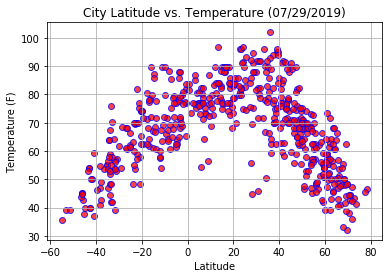

In [110]:

#plot
x = weather_df['Lat'].values
y = weather_df['Temp'].values
plt.title("City Latitude vs. Temperature ({})".format(date))
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
plt.scatter(lat, F_temp, marker="o", facecolors="red", 
            edgecolors="blue", alpha=0.75)
plt.savefig('Lat_v_Temp.png')


#### Latitude vs. Humidity Plot

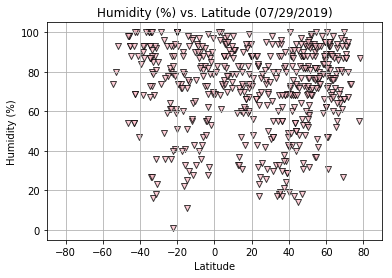

In [108]:
plt.ylim(-5,105, 1)
plt.xlim(-90,90)
x_axis = np.arange(-80, 90, 1)
y_axis = np.arange(0, 100, 10)
plt.grid()
plt.scatter(lat, humidity, marker="v", facecolors="pink", 
            edgecolors="black", alpha=0.75)
plt.title("Humidity (%) vs. Latitude ({})".format(date))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("humidity_vs_lat.png")
plt.show()

#### Latitude vs. Cloudiness Plot

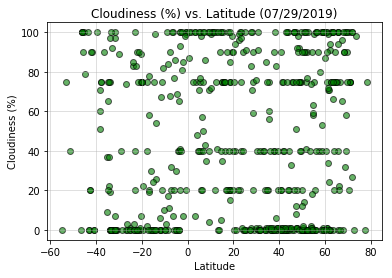

In [118]:
plt.scatter(lat, cloudiness, marker="o", facecolors="green", edgecolors="black",alpha=0.6)
plt.grid(alpha=0.5)
plt.title("Cloudiness (%) vs. Latitude ({})".format(date))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("cloud_vs_lat.png")
plt.show()

#### Latitude vs. Wind Speed Plot

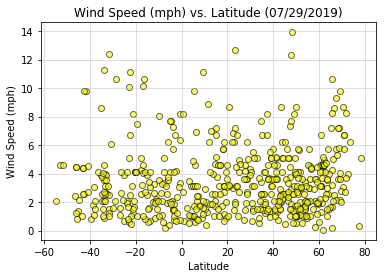

In [119]:

plt.scatter(lat, wind_speed, marker="o", facecolors="yellow", edgecolors="black",alpha=0.6)
plt.grid(alpha=0.5)
plt.title("Wind Speed (mph) vs. Latitude ({})".format(date))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("wind_vs_lat.png")
plt.show()